The following is a walkthrough on how to produce the four different types of data visualization presented in my Sergio Reguilon to Manchester United piece, including:

Three-coloured scatter plot
Pass maps
Take-on maps for a season
Pass locations 2d histogram

For the purposes of protecting the coordinate data that has been compiled, I have provided just one instance of each coordinate-based map as a sample, with data cleaning processes omitted.

In [2]:
# importing NumPy, Pandas, Math, Matplotlib, and Font Libraries

import numpy as np
import pandas as pd
import math
import matplotlib.image as image
from matplotlib import artist
import matplotlib.patches as mpatches
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Franklin Gothic Medium', 'Franklin Gothic Book']

# Part 1: Tackles Won per 90 by Interceptions Won per 90 visualization

The file containing the defensive statistics for this visualization can be found at https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats.

In [17]:
## Reading Defensive Statistics Library from FBRef.com

defensive = pd.read_excel(r'C:\Users\aaron\Documents\ET5L end of Season\FBRef ET5L Defensive Stats.xlsx')

In [18]:
## Filtering for defenders with more than 900 minutes of football in Europe's Top 5 Leagues

dffilter = (defensive['90s'] >= 10) & (defensive['Pos'].str.startswith('DF'))
defendersfiltered = defensive[dffilter]

In [19]:
## Creating DataFrame for defenders with necessary raw and processed columns from defendersfiltered

defendersfinal = pd.DataFrame()

# Player and squad names
defendersfinal['Player'] = defendersfiltered['Player']
defendersfinal['Squad'] = defendersfiltered['Squad']

# Tackles Won per 90- measures the number of tackles a player wins per 90 minutes played
defendersfinal['Tackles Won per 90'] = defendersfiltered['TklW']/defendersfiltered['90s']

# Interceptions per 90- measures the number of interceptions a player makes per 90 minutes played
defendersfinal['Interceptions per 90'] = defendersfiltered['Int']/defendersfiltered['90s']

In [20]:
## Mean calculations for important statistics in defendersfinal

x_mean = np.mean(defendersfinal['Tackles Won per 90'])
y_mean = np.mean(defendersfinal['Interceptions per 90'])

In [21]:
## Splitting DataFrame into three; one with all defenders, one with Manchester United Players, and one with Sergio Reguilon

# defenders
defendersfilter = ((defendersfinal['Squad'] != 'Manchester Utd') | \
        (defendersfinal['Player'] != 'Sergio Reguilón'))
defendersd = defendersfinal[defendersfilter]

# Manchester United players
mufilter = (defendersfinal['Squad'] == 'Manchester Utd')
muplayersd = defendersfinal[mufilter]

# Sergio Reguilon
reguilonfilter = (defendersfinal['Player'] == 'Sergio Reguilón')
reguilond = defendersfinal[reguilonfilter]

In [22]:
## Adaptation of Matplotlib.org's function for multicoloured text in visualizations: 

from matplotlib import transforms


def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='center', horizontalalignment='center')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = transforms.offset_copy(
                text.get_transform(), x=ex.width, units='dots')
        else:
            t = transforms.offset_copy(
                text.get_transform(), y=ex.height, units='dots')

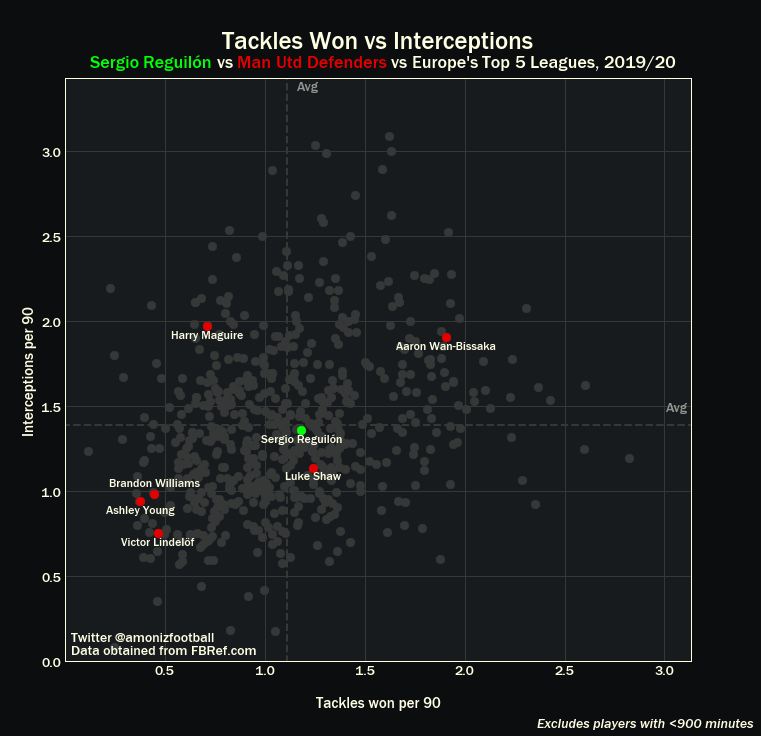

In [23]:
## Creating the scatter plot

# Establishing lists used for plotting in Matplotlib    
x1 = list(defendersd['Tackles Won per 90'])
x2 = list(muplayersd['Tackles Won per 90'])
x3 = list(reguilond['Tackles Won per 90'])
y1 = list(defendersd['Interceptions per 90'])
y2 = list(muplayersd['Interceptions per 90'])
y3 = list(reguilond['Interceptions per 90'])
n1 = list(defendersd['Player'])
n2 = list(muplayersd['Player'])
n3 = list(reguilond['Player'])

# Creating empty plot in desired 'fivethirtyeight' style with gridlines and desired backround colours and sizes, as well
# as aesthetic settings
fig,ax= plt.subplots(figsize=(10,10))
matplotlib.style.use('fivethirtyeight')
ax.grid(True, color='xkcd:dark grey')
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#171b1e')
ax.spines['bottom'].set_color('xkcd:off white')
ax.spines['top'].set_color('xkcd:off white')
ax.spines['left'].set_color('xkcd:off white')
ax.spines['right'].set_color('xkcd:off white')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.tick_params(axis='x', colors='xkcd:off white')
ax.tick_params(axis='y', colors='xkcd:off white')
plt.text(1.075,0.5,"\n", \
        horizontalalignment='right', verticalalignment='top', color='xkcd:off white', size='18', transform=ax.transAxes)
plt.text(1.1, -0.075, '\nExcludes players with <900 minutes', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:off white', \
             style='italic', transform=ax.transAxes, size='14')

# Establishing x and y limits
xlimval = max(max(x1), max(x2), max(x3))*1.01
ylimval = max(max(y1), max(y2), max(y3))*1.01
plt.xlim(0, xlimval*1.1)
plt.ylim(0, ylimval*1.1)
ax.set_xticklabels(['',0.5,1.0,1.5,2.0,2.5,3.0])

# Using Matplotlib's rainbow_text function from previous cell to label subtitle legend
words = "Sergio Reguilón vs Man Utd Defenders vs Europe's Top 5 Leagues, 2019/20".split()
colors = ['xkcd:bright green', 'xkcd:bright green', 'xkcd:off white', 'xkcd:red', 'xkcd:red', 'xkcd:red', \
         'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white']
rainbow_text(0.125, ylimval*1.12, words, colors, size=18)

# Adding graph and axes titles
ax.set_xlabel('\nTackles won per 90\n', color='xkcd:off white', size = 15)
ax.set_ylabel('\nInterceptions per 90', color='xkcd:off white', size = 15)
ax.set_title("\nTackles Won vs Interceptions\n", color='xkcd:off white', size=25)

# Adding plot points from each of the three DataFrames in different colours
plt.scatter(x=x1,y=y1,s=75, color='xkcd:dark grey', zorder=100)
plt.scatter(x=x2,y=y2,s=75, color='xkcd:red', zorder=100)
plt.scatter(x=x3,y=y3,s=75,color='xkcd:bright green', zorder=100)

# Creating and labelling average lines
plt.axhline(y=y_mean, xmin =-100, xmax=100, color='xkcd:dark grey', linestyle='--', linewidth=2)
plt.axvline(x=x_mean, ymin=-100,ymax=100, color='xkcd:dark grey', linestyle = '--', linewidth=2, zorder=0.2)
plt.text(x_mean/xlimval*1.04,0.995,'Avg', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)
plt.text(0.995,y_mean/ylimval,'Avg', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)

# Annotating some text below and some above- change based on need
for i in n2:
    if i != 'Brandon Williams':
        plt.annotate(i, (x1[n1.index(i)], y1[n1.index(i)]-0.07), color='xkcd:off white', \
        horizontalalignment='center', fontsize=12, zorder=100)   
for i in n2:
    if i == 'Brandon Williams':
        plt.annotate(i, (x1[n1.index(i)], y1[n1.index(i)]+0.05), color='xkcd:off white', \
        horizontalalignment='center', fontsize=12, zorder=100)   
for i in n3:
    plt.annotate(i, (x3[n3.index(i)], y3[n3.index(i)]-0.07), color='xkcd:off white', \
        horizontalalignment='center', fontsize=12, zorder=100)
    
# Watermarking visualization
plt.text(0.01, 0.05, 'Twitter @amonizfootball\nData obtained from FBRef.com', \
         horizontalalignment='left', verticalalignment='top', color='xkcd:off white', transform=ax.transAxes,zorder=1000)

plt.show()

# Part 2: Progresive Passing and Carrying Distance per 90

The file containing the passing and possession statistics required for this visualization can be found at the following:

Possession: https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats
Passing: https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats

In [39]:
## Reading passing and possession libraries from FBRef.com

passing = pd.read_excel(r'C:\Users\aaron\Documents\ET5L end of Season\FBRef ET5L Passing Stats.xlsx')
possession = pd.read_excel(r'C:\Users\aaron\Documents\ET5L end of Season\FBRef ET5L Possession Stats.xlsx')

In [40]:
## Filtering for position and player minutes played

passfilters = (passing['90s'] >= 10) & (passing['Pos'].str.startswith('DF'))
passfiltered = passing[passfilters]

possfilters = (possession['90s'] >= 10) & (passing['Pos'].str.startswith('DF'))
possessionfiltered = possession[possfilters]

In [41]:
## Creating overall passing overview by combining key features from both DataFrames

passing_overview = pd.DataFrame()


# Player and Squad Names
passing_overview['Player'] = passfiltered['Player']
passing_overview['Squad'] = passfiltered['Squad']

# Turnovers per Touch- Ratios the frequency with which a player loses the ball with the amount of times they touch the ball
passing_overview['Turnovers per Touch'] = ((passfiltered['Att'] - passfiltered['Cmp'] + possessionfiltered['Miscon'] + \
                                      possessionfiltered['Dispos'])/possessionfiltered['Touches'])

# Prg Dist Pass + Carry p90- Measures progressive yards per 90 minutes created by a player's passing and ball carrying
passing_overview['PrgDist Pass + Carry p90'] = ((passfiltered['PrgDist'] + \
                                                 possessionfiltered['PrgDistCarry'])/possessionfiltered['90s'])

In [42]:
# Computing mean values for Progressive Passing and Carrying, as well as Turnovers per Touch

x_mean = np.mean(passing_overview['PrgDist Pass + Carry p90'])
y_mean = np.mean(passing_overview['Turnovers per Touch'])

In [43]:
## Splitting the DataFrame into three; one for general defenders, one for Manchester United players, one for Reguilon

# Defenders
defendersfilter = ((passing_overview['Squad'] != 'Manchester Utd') | \
        (passing_overview['Player'] != 'Sergio Reguilón'))
defendersp = passing_overview[defendersfilter]

# Manchester United Players
mufilter = (passing_overview['Squad'] == 'Manchester Utd')
muplayersp = passing_overview[mufilter]

# Sergio Reguilon
reguilonfilter = (passing_overview['Player'] == 'Sergio Reguilón')
reguilonp = passing_overview[reguilonfilter]

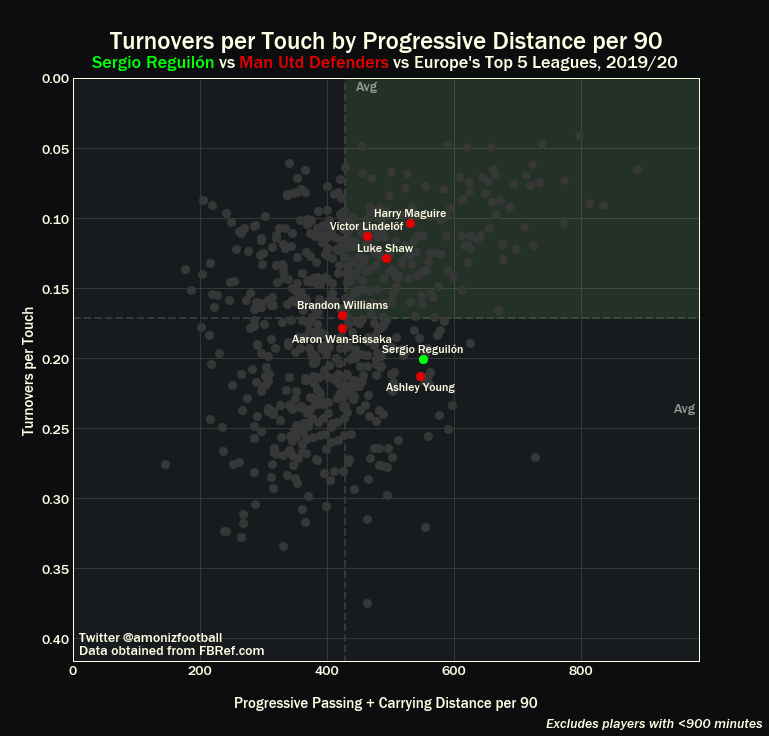

In [44]:
## Creating the scatter plot

# Establishing lists used for plotting in Matplotlib
x4 = list(defendersp['PrgDist Pass + Carry p90'])
x5 = list(muplayersp['PrgDist Pass + Carry p90'])
x6 = list(reguilonp['PrgDist Pass + Carry p90'])
y4 = list(defendersp['Turnovers per Touch'])
y5 = list(muplayersp['Turnovers per Touch'])
y6 = list(reguilonp['Turnovers per Touch'])
n4 = list(defendersp['Player'])
n5 = list(muplayersp['Player'])
n6 = list(reguilonp['Player'])

# Creating empty plot in desired 'fivethirtyeight' style with gridlines and desired backround colours and sizes, as well
# as aesthetic settings
fig,ax= plt.subplots(figsize=(10,10))
matplotlib.style.use('fivethirtyeight')
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#171b1e')
ax.grid(True, color='xkcd:dark grey')
ax.spines['bottom'].set_color('xkcd:off white')
ax.spines['top'].set_color('xkcd:off white')
ax.spines['left'].set_color('xkcd:off white')
ax.spines['right'].set_color('xkcd:off white')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.tick_params(axis='x', colors='xkcd:off white')
ax.tick_params(axis='y', colors='xkcd:off white')
plt.text(1.075,0.4,"\n", \
        horizontalalignment='right', verticalalignment='top', color='xkcd:off white', size='18', transform=ax.transAxes)
plt.text(1.1, -0.075, '\nExcludes players with <900 minutes', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:off white', \
             style='italic', transform=ax.transAxes, size='14')

# Using Matplotlib's rainbow_text function from previous cell to label subtitle legend
words = "Sergio Reguilón vs Man Utd Defenders vs Europe's Top 5 Leagues, 2019/20".split()
colors = ['xkcd:bright green', 'xkcd:bright green', 'xkcd:off white', 'xkcd:red', 'xkcd:red', 'xkcd:red', \
         'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white']
rainbow_text(30, -0.0075, words, colors, size=18)

# Establishing axis labels and graph title
ax.set_xlabel('\nProgressive Passing + Carrying Distance per 90\n', color='xkcd:off white', size = 15)
ax.set_ylabel('\nTurnovers per Touch', color='xkcd:off white', size = 15)
ax.set_title("\nTurnovers per Touch by Progressive Distance per 90\n", color='xkcd:off white', size=25)

# Adding plot points
plt.scatter(x=x4,y=y4,s=75, color='xkcd:dark grey', zorder=100)
plt.scatter(x=x5,y=y5,s=75, color='xkcd:red', zorder=100)
plt.scatter(x=x6,y=y6,s=75,color='xkcd:bright green', zorder=100)

# Establishing plot limits
xlimval2 = max(max(x4), max(x5), max(x6))*1.01
ylimval2 = max(max(y4), max(y5), max(y6))*1.01
plt.xlim(0,xlimval2*1.1)
plt.ylim(0,ylimval2*1.1)
plt.gca().invert_yaxis()

# Setting average lines and top quadrant green tint
plt.axhline(y=y_mean, xmin =-100, xmax=100, color='xkcd:dark grey', linestyle='--', linewidth=2)
plt.axvline(x=x_mean, ymin=-100,ymax=100, color='xkcd:dark grey', linestyle = '--', linewidth=2, zorder=0.2)
ax.fill_between([x_mean, 1000], 0, y_mean, alpha=0.1, color='xkcd:light green', zorder=10)
plt.text((x_mean/xlimval2)+0.01,0.995,'Avg', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)
plt.text(0.995,(y_mean/ylimval2)-0.01,'Avg', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)

# Annotating- some text below and some above based on need
for i in n2:
    if i != 'Aaron Wan-Bissaka' and i != 'Ashley Young':
        plt.annotate(i, (x4[n4.index(i)], y4[n4.index(i)]-0.005), color='xkcd:off white', \
        horizontalalignment='center', fontsize=12, zorder=100)   
for i in n2:
    if i == 'Aaron Wan-Bissaka' or i == 'Ashley Young':
        plt.annotate(i, (x4[n4.index(i)], y4[n4.index(i)]+0.01), color='xkcd:off white', \
        horizontalalignment='center', fontsize=12, zorder=100)    
for i in n3:
    plt.annotate(i, (x6[n6.index(i)], y6[n6.index(i)]-0.005), color='xkcd:off white', \
        horizontalalignment='center', fontsize=12, zorder=100)

# Watermarking
plt.text(0.01, 0.05, 'Twitter @amonizfootball\nData obtained from FBRef.com', \
         horizontalalignment='left', verticalalignment='top', color='xkcd:off white', transform=ax.transAxes,zorder=1000)    

plt.show()

# Part 3: npxG and xA per 90 

This section uses the following table from FBRef.com: https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats

In [45]:
## importing attacking libraries from FBRef.com

standard = pd.read_excel(r'C:\Users\aaron\Documents\ET5L end of Season\FBRef ET5L Standard Stats.xlsx')

In [46]:
## filtering for defenders with 900+ minutes

deffilter = (standard['Min'] >= 900) & (standard['Pos'].str.startswith('DF'))
attstats = standard[deffilter]

In [47]:
## computing expected assists per 90 and expected goals per 90 mean values

x_mean = np.mean(attstats['xA5'])
y_mean = np.mean(attstats['npxG6'])

In [48]:
## splitting DataFrame into three categories; one for general defenders, Manchester United players, and Reguilon

# Defenders
defendersfilter = ((attstats['Squad'] != 'Manchester Utd') | \
        (attstats['Player'] != 'Sergio Reguilón'))
defendersa = attstats[defendersfilter]

# Manchester United players
mufilter = (attstats['Squad'] == 'Manchester Utd')
muplayersa = attstats[mufilter]

# Reguilon
reguilonfilter = (attstats['Player'] == 'Sergio Reguilón')
reguilona = attstats[reguilonfilter]

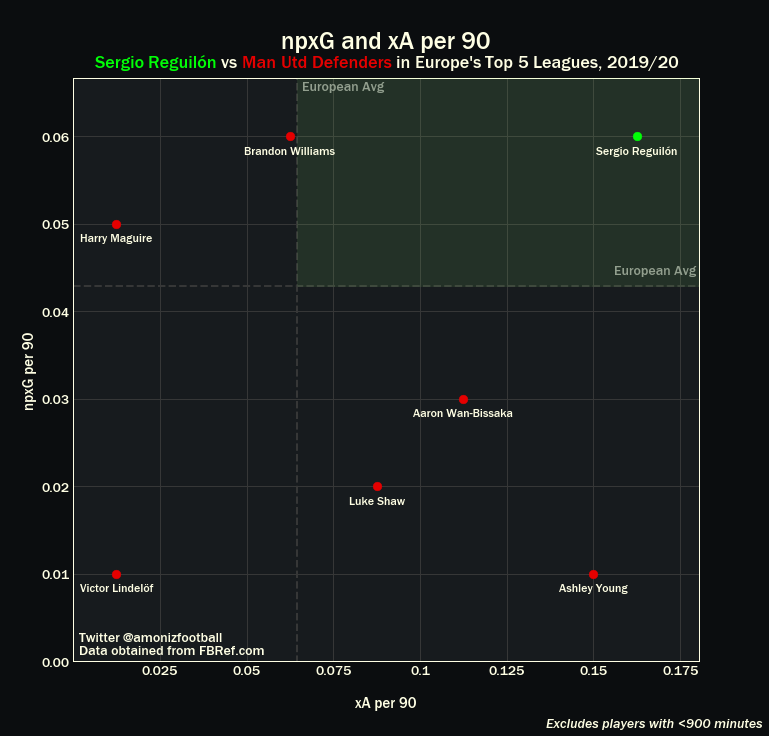

In [49]:
## Creating visualization

# Establishing lists for plotting in matplotlib
x7 = list(defendersa['xA5'])
x8 = list(muplayersa['xA5'])
x9 = list(reguilona['xA5'])
y7 = list(defendersa['npxG6'])
y8 = list(muplayersa['npxG6'])
y9 = list(reguilona['npxG6'])
n7 = list(defendersa['Player'])
n8 = list(muplayersa['Player'])
n9 = list(reguilona['Player'])

# Creating empty plot in desired 'fivethirtyeight' style with gridlines and desired backround colours and sizes, as well
# as aesthetic settings
fig,ax= plt.subplots(figsize=(10,10))
matplotlib.style.use('fivethirtyeight')
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#171b1e')
ax.grid(True, color='xkcd:dark grey')
ax.spines['bottom'].set_color('xkcd:off white')
ax.spines['top'].set_color('xkcd:off white')
ax.spines['left'].set_color('xkcd:off white')
ax.spines['right'].set_color('xkcd:off white')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.tick_params(axis='x', colors='xkcd:off white')
ax.tick_params(axis='y', colors='xkcd:off white')
plt.text(1.075,0.4,"\n", \
        horizontalalignment='right', verticalalignment='top', color='xkcd:off white', size='18', transform=ax.transAxes)
plt.text(1.1, -0.075, '\nExcludes players with <900 minutes', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:off white', \
             style='italic', transform=ax.transAxes, size='14')

# Setting necessary limits
xlimval3 = max(max(x8), max(x9))*1.01
ylimval3 = max(max(y8), max(y9))*1.01
plt.xlim(0,xlimval3*1.1)
plt.ylim(0,ylimval3*1.1)
ax.set_xticklabels(['',0.025,0.050,0.075,0.100,0.125,0.150,0.175,0.200])

# labelling chart and axes
ax.set_xlabel('\nxA per 90\n', color='xkcd:off white', size = 15)
ax.set_ylabel('\nnpxG per 90', color='xkcd:off white', size = 15)
ax.set_title("\nnpxG and xA per 90\n", color='xkcd:off white', size=25)

# Using rainbow_label function in matplotlib to label subtitle legend
words = "Sergio Reguilón vs Man Utd Defenders in Europe's Top 5 Leagues, 2019/20".split()
colors = ['xkcd:bright green', 'xkcd:bright green', 'xkcd:off white', 'xkcd:red', 'xkcd:red', 'xkcd:red', \
         'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white']
rainbow_text(0.005, ylimval3*1.12, words, colors, size=18)

# Adding plot points
plt.scatter(x=x8,y=y8,s=75, color='xkcd:red', zorder=100)
plt.scatter(x=x9,y=y9,s=75,color='xkcd:bright green', zorder=100)

# Adding European average lines and labels
plt.axhline(y=y_mean, xmin =-100, xmax=100, color='xkcd:dark grey', linestyle='--', linewidth=2)
plt.axvline(x=x_mean, ymin=-100,ymax=100, color='xkcd:dark grey', linestyle = '--', linewidth=2, zorder=0.2)
ax.fill_between([x_mean, 1000], y_mean,1000, alpha=0.1, color='xkcd:light green', zorder=10)
plt.text(x_mean/xlimval3*1.1,0.995,'European Avg', \
         horizontalalignment='center', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)
plt.text(0.995,y_mean/ylimval3*0.96,'European Avg', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)

# Different labelling loops- adjust as needed
for i in n2:
    plt.annotate(i, (x8[n8.index(i)], y8[n8.index(i)]-0.002), color='xkcd:off white', \
        horizontalalignment='center', fontsize=12, zorder=100)       
for i in n3:
    plt.annotate(i, (x9[n9.index(i)], y9[n9.index(i)]-0.002), color='xkcd:off white', \
        horizontalalignment='center', fontsize=12, zorder=100)

# Watermark
plt.text(0.01, 0.05, 'Twitter @amonizfootball\nData obtained from FBRef.com', \
         horizontalalignment='left', verticalalignment='top', color='xkcd:off white', transform=ax.transAxes,zorder=1000)
    
plt.show()

# Part 4: Pass Map

In [ ]:
# Loading match data

passmap = pd.read_csv(r'C:\Users\aaron\Pictures\BLM\Reguilon Match Data\La Liga\Getafe 0-3 Sevilla.csv')
passmap

In [ ]:
## creating list of all passes start and end co-ordinates in a given match

playerfilter #filter for player name and action as needed
passmapedited = passmap[playerfilter]

# adjusting x-data for square-based co-ordinates (ie 100x100 labelled pitches)
passmapedited['x'] = passmapedited['x']*1.04
passmapedited['endX'] = passmapedited['endX']*1.04

# adjusting y-data for square-based co-ordinates
passmapedited['y'] = passmapedited['y']*0.68
passmapedited['endY'] = passmapedited['endY']*0.68

passmapedited

Pitch dimensions adapted from Peter McKeever's "Plotting Pitches in Python"

In [ ]:
## Plotting the pitch and pass maps

# setting plot and pitch parameters, as well as style settings
fig, ax = plt.subplots(figsize=(13,8.5))
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#1b1d1e')
plt.axis('Off')

# Plotting pitches using Peter McKeever's pitch dimensions 
ly1 = [0,0,68,68,0]
lx1 = [0,104,104,0,0]
plt.plot(lx1,ly1,color="xkcd:off white",zorder=5, linewidth=2)
    
ly2 = [13.84,13.84,54.16,54.16] 
lx2 = [104,87.5,87.5,104]
plt.plot(lx2,ly2,color="xkcd:off white",zorder=5, linewidth=2)

ly3 = [13.84,13.84,54.16,54.16] 
lx3 = [0,16.5,16.5,0]
plt.plot(lx3,ly3,color="xkcd:off white",zorder=5, linewidth=2)  

ly4 = [30.34,30.34,37.66,37.66]
lx4 = [104,104.2,104.2,104]
plt.plot(lx4,ly4,color="xkcd:off white",zorder=5, linewidth=2)

ly5 = [30.34,30.34,37.66,37.66]
lx5 = [0,-0.2,-0.2,0]
plt.plot(lx5,ly5,color="xkcd:off white",zorder=5, linewidth=2)

ly6 = [24.84,24.84,43.16,43.16]
lx6 = [104,99.5,99.5,104]
plt.plot(lx6,ly6,color="xkcd:off white",zorder=5, linewidth=2)

ly7 = [24.84,24.84,43.16,43.16]
lx7 = [0,4.5,4.5,0]
plt.plot(lx7,ly7,color="xkcd:off white",zorder=5, linewidth=2)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=2,alpha=1)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=2,alpha=1)

rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec3 = plt.Rectangle((-1,-1), 106,70,color='#1b1d1e',zorder=1,alpha=1, linewidth=2)

vcy5 = [0,68] 
vcx5 = [52,52]
plt.plot(vcx5,vcy5,color="xkcd:off white",zorder=5, linewidth=2)

plt.scatter(93,34,color="xkcd:off white",zorder=5, s=40)
plt.scatter(11,34,color="xkcd:off white",zorder=5, s=40)
plt.scatter(52,34,color="xkcd:off white",zorder=5, s=40)

ax.add_artist(rec3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(rec1)
ax.add_artist(rec2)
ax.add_artist(circle3)

# pass map title and subtitle
plt.title('Pass Map | Sergio Reguilón', color='xkcd:off white', size=25, horizontalalignment='center')
plt.text(0.5, 1.0, "Getafe 0-3 Sevilla | February 23rd, 2020", \
         horizontalalignment='center', verticalalignment='top', color='xkcd:off white', size='18', \
             transform=ax.transAxes)

# enables labelling of successful passes
succ = 0
total = 0

# looping colour-coded arrows onto pitch
for i in range(len(passmapedited)):
    if list(passmapedited[''])[i] == 0:
        plt.scatter(list(passmapedited["x"])[i],list(passmapedited["y"])[i],s=25, color="xkcd:dark red", zorder=100)
        plt.arrow(list(passmapedited['x'])[i], list(passmapedited['y'])[i],\
                  list(passmapedited['endX'])[i]-list(passmapedited['x'])[i], \
                list(passmapedited['endY'])[i]-list(passmapedited['y'])[i], \
                  color='xkcd:dark red', width=0.1, head_width=0.75, zorder=100)
        total +=1
    else:
        plt.scatter(list(passmapedited["x"])[i],list(passmapedited["y"])[i],s=30, color="xkcd:green", zorder=100)  
        plt.arrow(list(passmapedited['x'])[i], list(passmapedited['y'])[i], \
                  list(passmapedited['endX'])[i]-list(passmapedited['x'])[i], \
                  list(passmapedited['endY'])[i]-list(passmapedited['y'])[i], \
                 color='xkcd:green', width=0.1, head_width=0.75, zorder=100)
        succ +=1
        total += 1
        
# labelling number of successful passes
plt.text(0.95, 0.98, str(succ)+'/'+str(total)+' successful, ' + str(round(succ/total*100)) + '%', \
         horizontalalignment='right', verticalalignment='center', color='xkcd:green', size='12', \
             transform=ax.transAxes, zorder=100)

# labelling direction of play
plt.text(0.5, -0.02, "Direction of Play", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', size='12', \
             transform=ax.transAxes)
plt.text(0.5, 0.01, "→", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', size='35', \
             transform=ax.transAxes)

# creating legend for successful and unsuccessful passes
green_patch = mpatches.Patch(color='xkcd:green', label='Successful Passes')
red_patch = mpatches.Patch(color='xkcd:dark red', label='Failed Passes')
leg = plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(0.96,0.04), prop={'size':14}) 
for text in leg.get_texts():
    plt.setp(text, color = 'xkcd:off white')
frame = leg.get_frame()
frame.set_color('#0b0d0f')

# Watermark
plt.text(0.045, -0.01, 'Created by @amonizfootball', \
         horizontalalignment='left', verticalalignment='center', color='xkcd:off white', \
             transform=ax.transAxes, size='16')
    
plt.show()

# Part 5: Take-ons

In [ ]:
# Reading CSV containing season-long event data

sevilla = pd.read_csv(r'C:\Users\aaron\Pictures\BLM\Reguilon Match Data\La Liga\AASevilla La Liga 2020.csv')

In [10]:
## Filtering for take-on start locations and adjusting coordinate data

playerfilter = ## Filter for player name and take on locations
reguilon = sevilla[playerfilter]

# adjusting x-data for pitch coordinates
reguilon['x'] = reguilon['x']*1.04

# adjusting y-data for pitch coordinates
reguilon['y'] = reguilon['y']*0.68

SyntaxError: invalid syntax (<ipython-input-10-46b33cf318a9>, line 3)

In [ ]:
## Plotting take-on map

# Setting plot and pitch parameters, as well as style settings
fig, ax = plt.subplots(figsize=(13,8.5))
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#1b1d1e')
plt.axis('Off')

# Plotting pitch based on Peter McKeever's Plotting Pitches in Python
ly1 = [0,0,68,68,0]
lx1 = [0,104,104,0,0]
plt.plot(lx1,ly1,color="xkcd:off white",zorder=5, linewidth=2)
    
ly2 = [13.84,13.84,54.16,54.16] 
lx2 = [104,87.5,87.5,104]
plt.plot(lx2,ly2,color="xkcd:off white",zorder=5, linewidth=2)

ly3 = [13.84,13.84,54.16,54.16] 
lx3 = [0,16.5,16.5,0]
plt.plot(lx3,ly3,color="xkcd:off white",zorder=5, linewidth=2)  

ly4 = [30.34,30.34,37.66,37.66]
lx4 = [104,104.2,104.2,104]
plt.plot(lx4,ly4,color="xkcd:off white",zorder=5, linewidth=2)

ly5 = [30.34,30.34,37.66,37.66]
lx5 = [0,-0.2,-0.2,0]
plt.plot(lx5,ly5,color="xkcd:off white",zorder=5, linewidth=2)

ly6 = [24.84,24.84,43.16,43.16]
lx6 = [104,99.5,99.5,104]
plt.plot(lx6,ly6,color="xkcd:off white",zorder=5, linewidth=2)

ly7 = [24.84,24.84,43.16,43.16]
lx7 = [0,4.5,4.5,0]
plt.plot(lx7,ly7,color="xkcd:off white",zorder=5, linewidth=2)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=2,alpha=1)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=2,alpha=1)

rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec3 = plt.Rectangle((-1,-1), 106,70,color='#1b1d1e',zorder=1,alpha=1, linewidth=2)

vcy5 = [0,68] 
vcx5 = [52,52]
plt.plot(vcx5,vcy5,color="xkcd:off white",zorder=5, linewidth=2)

plt.scatter(93,34,color="xkcd:off white",zorder=5, s=40)
plt.scatter(11,34,color="xkcd:off white",zorder=5, s=40)
plt.scatter(52,34,color="xkcd:off white",zorder=5, s=40)

# chart title and subtitle
plt.title('Take Ons | Sergio Reguilón', color='xkcd:off white', size=25, **bfont, horizontalalignment='center')
plt.text(0.5, 1.0, "Matches in La Liga 2019/20", \
         horizontalalignment='center', verticalalignment='top', color='xkcd:off white', size='18', \
             transform=ax.transAxes)

# enabling counter for successful attempts
succ2 = 0
total2 = 0

# adding all scatter locations to the pitch
for i in range(len(reguilon)):
    if list(reguilon[''])[i] == 0:
        plt.scatter(list(reguilon["x"])[i],list(reguilon["y"])[i],s=25, color="xkcd:dark red", zorder=100)
        total2 +=1
    else:
        plt.scatter(list(reguilon["x"])[i],list(reguilon["y"])[i],s=30, color="xkcd:green", zorder=100)  
        succ2 +=1
        total2 += 1

ax.add_artist(rec3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(rec1)
ax.add_artist(rec2)
ax.add_artist(circle3)
        
# displaying number of successful passes
plt.text(0.95, 0.98, str(succ2)+'/'+str(total2)+' successful, ' + str(round(succ/total*100)) + '%', \
         horizontalalignment='right', verticalalignment='center', color='xkcd:green', size='12', \
             transform=ax.transAxes, zorder=100)
        
# displaying direction of play
plt.text(0.5, -0.02, "Direction of Play", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', size='12', \
             transform=ax.transAxes)
plt.text(0.5, 0.01, "→", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', size='35', \
             transform=ax.transAxes)


## setting legend for successful and unsuccessful take-on attempts
green_patch = mpatches.Patch(color='xkcd:green', label='Successful')
red_patch = mpatches.Patch(color='xkcd:dark red', label='Failed')
leg = plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(0.96,0.04), prop={'size':14}) 
for text in leg.get_texts():
    plt.setp(text, color = 'xkcd:off white')
frame = leg.get_frame()
frame.set_color('#0b0d0f')

# Watermarking code
plt.text(0.045, -0.02, 'Created by @amonizfootball', \
         horizontalalignment='left', verticalalignment='center', color='xkcd:off white', \
             transform=ax.transAxes, size='16')
    
plt.show()

# Part 6- Creating Pass Locations 2d-histogram plot

In [ ]:
## Filtering for pass start locations and adjusting coordinate data

playerfilter = ## Filter for player name and take on locations
reguilon = sevilla[playerfilter]

# adjusting x-data for pitch coordinates
reguilon['x'] = reguilon['x']*1.04

# adjusting y-data for pitch coordinates
reguilon['y'] = reguilon['y']*0.68

In [ ]:
## Plotting the histogram

# creating plots, establishing parameters, style designs, fixing spacing issues
fig, ax = plt.subplots(figsize=(16,8.5))
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#1b1d1e')
plt.rc_context({'ytick.color':'xkcd:off white'})
plt.text(-0.05, 1.02, '\n', \
         horizontalalignment='right', verticalalignment='center', color='xkcd:green', size='12', \
             transform=ax.transAxes, zorder=100)
plt.axis('Off')

# drawing football pitch according to Peter McKeever's suggested dimensions
ly1 = [0,0,68,68,0]
lx1 = [0,104,104,0,0]
plt.plot(lx1,ly1,color="xkcd:off white",zorder=5, linewidth=2)
    
ly2 = [13.84,13.84,54.16,54.16] 
lx2 = [104,87.5,87.5,104]
plt.plot(lx2,ly2,color="xkcd:off white",zorder=5, linewidth=2)

ly3 = [13.84,13.84,54.16,54.16] 
lx3 = [0,16.5,16.5,0]
plt.plot(lx3,ly3,color="xkcd:off white",zorder=5, linewidth=2)  

ly4 = [30.34,30.34,37.66,37.66]
lx4 = [104,104.2,104.2,104]
plt.plot(lx4,ly4,color="xkcd:off white",zorder=5, linewidth=2)

ly5 = [30.34,30.34,37.66,37.66]
lx5 = [0,-0.2,-0.2,0]
plt.plot(lx5,ly5,color="xkcd:off white",zorder=5, linewidth=2)

ly6 = [24.84,24.84,43.16,43.16]
lx6 = [104,99.5,99.5,104]
plt.plot(lx6,ly6,color="xkcd:off white",zorder=5, linewidth=2)

ly7 = [24.84,24.84,43.16,43.16]
lx7 = [0,4.5,4.5,0]
plt.plot(lx7,ly7,color="xkcd:off white",zorder=5, linewidth=2)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=2,alpha=1)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=2,alpha=1)

rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec3 = plt.Rectangle((-1,-1), 106,70,color='#1b1d1e',zorder=1,alpha=1, linewidth=2)

vcy5 = [0,68] 
vcx5 = [52,52]
plt.plot(vcx5,vcy5,color="xkcd:off white",zorder=5, linewidth=2)

plt.scatter(93,34,color="xkcd:off white",zorder=5, s=40)
plt.scatter(11,34,color="xkcd:off white",zorder=5, s=40)
plt.scatter(52,34,color="xkcd:off white",zorder=5, s=40)

ax.add_artist(rec3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(rec1)
ax.add_artist(rec2)
ax.add_artist(circle3)

## Title and subtitle
plt.title('Pass Locations | Sergio Reguilón\n', color='xkcd:off white', size=25,, horizontalalignment='center')
plt.text(0.5, 1.05, "Matches in La Liga 2019/20", \
         horizontalalignment='center', verticalalignment='top', color='xkcd:off white', size='18', \
             transform=ax.transAxes)

# creating 2d-histogram bins and charting them in matplotlib
plt.hist2d(reguilon['x'], reguilon['y'], bins=10, cmap='gist_heat', zorder=4, alpha=0.8, cmin=1, range=([[0,104],[0,68]]),\
          density=False)
cb = plt.colorbar()
cb.set_label('number of passes', color='xkcd:off white', fontsize=12)

# setting direction of play in Python
plt.text(0.5, -0.05, "Direction of Play", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', size='12', \
             transform=ax.transAxes)
plt.text(0.5, -0.02, "→", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white', size='35', \
             transform=ax.transAxes)
# Watermark
plt.text(0.0, -0.03, 'Created by @amonizfootball', \
         horizontalalignment='left', verticalalignment='center', color='xkcd:off white', \
             transform=ax.transAxes, size='16')

plt.show()